<a href="https://colab.research.google.com/github/nicolez9911/colab/blob/main/mathofdl/Math_of_DL_L2_EXERCISES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Mathematics of Deep Learning
## Lecture 2 Exercises

---
## 1. Linear Regression with Gradient Descent

In this exercise, we perform linear regression from scratch using a real-word dataset relating poverty and murder rates, found [here](https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html).

In [2]:
## Use pandas to import the data

data_url = 'https://github.com/arputtick/dataism/raw/master/assignments/Week%203/Income%20vs.%20Murder.xlsx'
poverty_murder_data = pd.read_excel(data_url)
poverty_murder_data

,Percent with income below $ 5000,"Number of murders per 1,000,000 inhabitants"
0,16.5,11.2
1,20.5,13.4
2,26.3,40.7
3,16.5,5.3
4,19.2,24.8
5,16.5,12.7
6,20.2,20.9
7,21.3,35.7
8,17.2,8.7
9,14.3,9.6


In [3]:
## Extract our samples in X array and labels in Y array

X = poverty_murder_data['Percent with income below $ 5000']
Y = poverty_murder_data['Number of murders per 1,000,000 inhabitants']

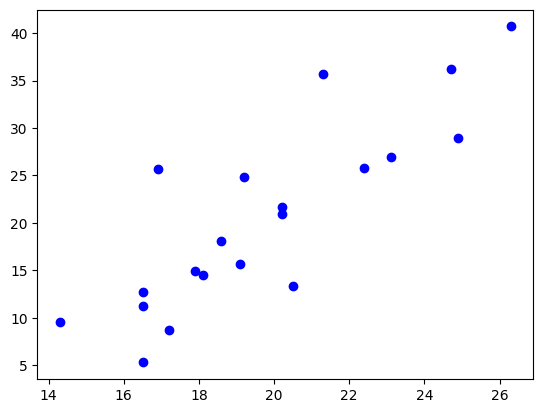

In [4]:
## Plot the data

# include the original data points in our plot
plt.plot(X, Y, 'bo')

# display the plot
plt.show()

In [5]:
## Initialize weights
w = np.random.random_sample() * 10
b = np.random.random_sample() * 100

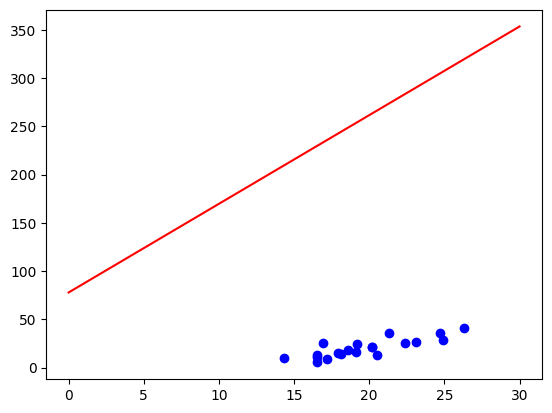

In [6]:
## Plot the initial line

# include the original data points in our plot
plt.plot(X, Y, 'bo')

# take a long list of 100 values on the x-axis between 0 and 30
x = np.linspace(0,30,100)

# compute the corresponding y-values for that long list
y = w*x + b # predictions for values in that long list

# connect all of these points with a red line
plt.plot(x, y, '-r') # -r = red line

# start the plot at the point (0,0)
# plt.ylim(ymin = 0)
# plt.xlim(xmin = 0)

# display the plot
plt.show()

## EXERCISE: Define the loss function

In [7]:
## Define Loss Function

def compute_loss(w,b):
    ### YOUR CODE HERE ###
    n = len(X)
    Y_pred = w*X + b
    sq_diff = (Y_pred - Y)**2
    loss = 1/n * np.sum(sq_diff)

    ######################
    return loss

In [8]:
compute_loss(w,b)

57362.113809460774

In [9]:
## Train the model with a for-loop for gradient descent.

# Compute the loss after each parameter update and keep track
# in the following list:
loss_hist = []
learning_rate = .0001

# Number of steps to take:
num_steps = 500

for step in range(num_steps):
    loss = compute_loss(w,b)
    loss_hist.append(loss)
    ### YOUR CODE HERE ###
    Y_pred = w*X + b
    # !! ableitung für gradient descent !!
    dw = 2/len(X) * np.sum((Y_pred - Y) * X)
    db = 2/len(X) * np.sum(Y_pred - Y)
    w = w - learning_rate * dw
    b = b - learning_rate * db

    ######################


print('final weight: ', w)
print('final bias: ', b)


final weight:  -2.727089875467461
final bias:  77.0186950041397


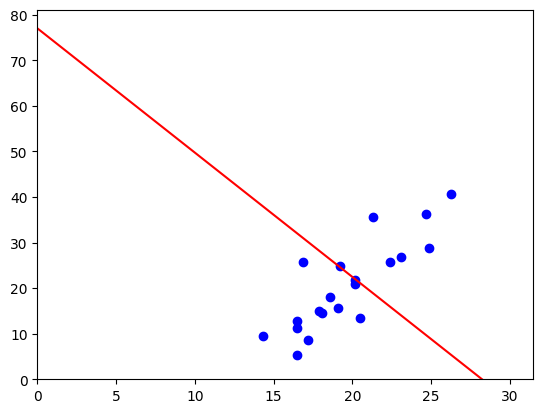

In [10]:
## Plot the final line

# include the original data points in our plot
plt.plot(X, Y, 'bo')

# take a long list of 100 values on the x-axis between 0 and 30
x = np.linspace(0,30,100)

# compute the corresponding y-values for that long list
y = w*x + b # predictions for values in that long list

# connect all of these points with a red line
plt.plot(x, y, '-r') # -r = red line

# start the plot at the point (0,0)
plt.ylim(ymin = 0)
plt.xlim(xmin = 0)

# display the plot
plt.show()

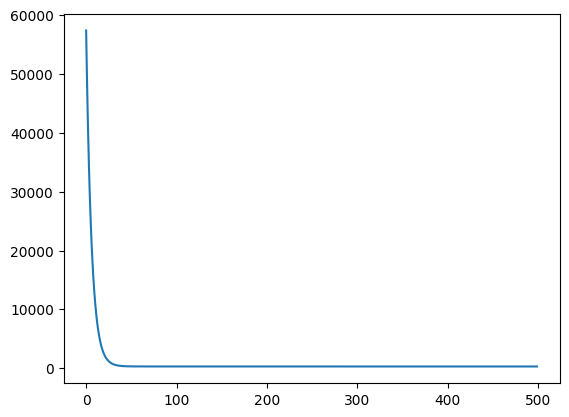

In [11]:
# Visualize how the loss changed over time

plt.plot(loss_hist)
plt.show()

In [ ]:
## BONUS ##

# Play around with the learning rate and num_steps to try to train faster.
# See what happens if you try different weight initializations.

---


## 2. Regression with a Neural Network

---
In this exercise, we code a simple 2-layer neural network from scratch to fit
the same data as in exercise 1. We compute the forward pass for you (see exercises from the first lecture to practice yourself).

The main work is to implement backpropagation and gradient descent.

This network will have the following architecture and use ReLU in the first hidden layer and no activation function in the second:
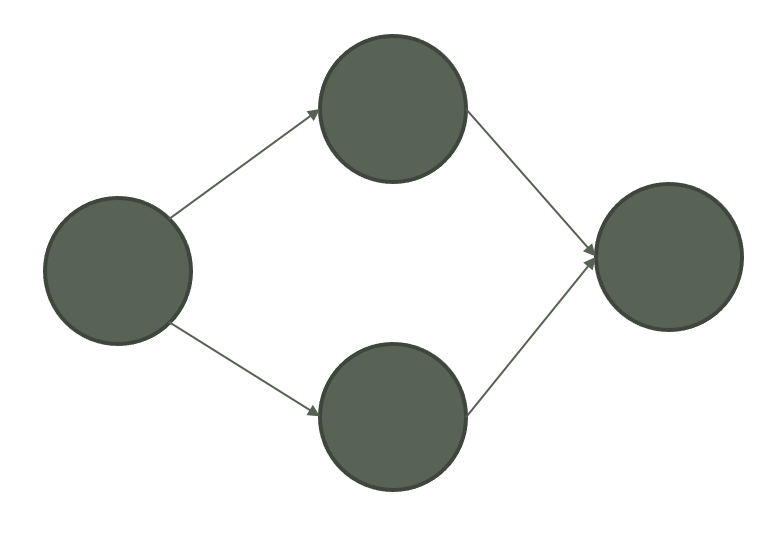

Since we will initialize the weights from a standard gaussian, it is good to normalize the data to put in on the same scale as the weights. This way the initialized model already outputs numbers on the same scale as the labels in the data.

In [12]:
# Normalize the data

X_norm = np.array((X - np.mean(X)) / np.std(X))
Y_norm = np.array((Y - np.mean(Y)) / np.std(Y))

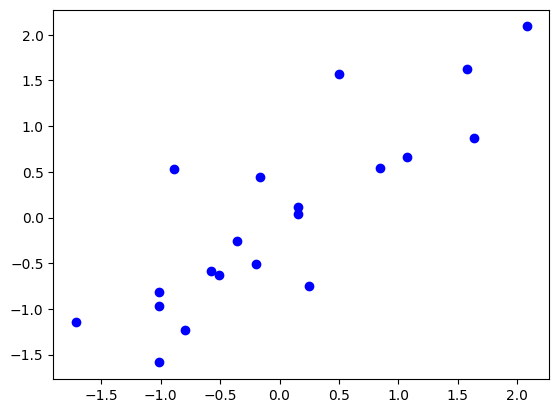

In [13]:
## Plot the data

# include the original data points in our plot
plt.plot(X_norm, Y_norm, 'bo')

# display the plot
plt.show()

In [14]:
## Initialize weights

# First Layer
W1 = np.random.normal((2,1))
b1 = np.random.normal((2,1))

# Second Layer
W2 = np.random.normal((1,2)).reshape(1,2)
b2 = np.random.normal((1,))


initial_weights = [W1, b1, W2, b2]

---
## Compute the forward pass

In [15]:
## Compute the forward pass
def feed_forward(X, weights):
    '''
    Computes the forward pass for the given network with specified
    input data X and weights.

    -X: A 1xn array, where n is the number of samples.
    -weights: A list [W1, b1, W2, b2] of weight arrays in the same shape
    as those initialized above.

    returns:
    -out: A 1xn array consisting of the models predictions for the given input X
    -weights: Same as input. For use in future computation.
    -cache: List of intermediate outputs needed for future computation.

    '''

    W1, b1, W2, b2 = weights
    cache = []

    ## Output of first layer
    W1 = W1.reshape(2,1)
    b1 = b1.reshape(2,1)
    X = np.array(X).reshape(1,len(X))

    Z1 = W1.dot(X) + b1
    H1 = np.maximum(Z1, 0)

    ## Output of second layer
    out = W2.dot(H1) + b2

    cache = H1, Z1

###
    return out, weights, cache


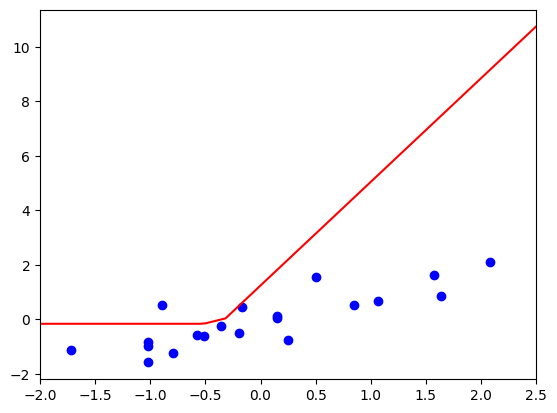

In [16]:
## Plot the initial curve

# include the original data points in our plot
plt.plot(X_norm, Y_norm, 'bo')

# take a long list of 100 values on the x-axis between 0 and 30
x = np.linspace(-2,2.5,100)

# compute the corresponding y-values for that long list
y = feed_forward(x, initial_weights)[0].reshape(100,1) # predictions for values in that long list

# connect all of these points with a red line
plt.plot(x, y, '-r') # -r = red line

# start the plot at the point (0,0)
# plt.ylim(ymin = 0)
plt.xlim(xmin = -2, xmax = 2.5)

# display the plot
plt.show()

In [17]:
## Define loss function
# This is similar to the function you saw in part 1.

def mean_squared_loss(out,Y):
    n = len(X)
    sq_diff = (out - Y.reshape(1,20))**2
    loss = 1/n * np.sum(sq_diff)
    return loss

---
## Gradient checking

The function below will be used to check your backpropagation implementation.
It computes the *numerical gradient* of the loss function with respect to the model parameters.

Recall that for a function $f\colon \mathbb{R}\to\mathbb{R},$ the derivative is given by:
$$f'(x) = \lim_{h\to 0} \frac{f(x+h)-f(x)}{h}.$$

Therefore, for very small values of $h$, we can approximate the derivative via
$$f'(x) \approx\frac{f(x+h)-f(x)}{h}.$$

The function below uses this idea to approximate the gradient of the loss function.

In [18]:
import copy

def loss_numerical_gradient(weights, index, h = .00001):
    '''computes the numerical gradient of the loss
    relative to the parameter weights[index]'''

    num_grad = np.zeros_like(weights[index])

    it = np.nditer(weights[index], flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        ix = it.multi_index
        weights_mh = copy.deepcopy(weights)
        weights_mh[index][ix] -= h
        out_mh = feed_forward(X_norm, weights_mh)[0]

        weights_ph = copy.deepcopy(weights)
        weights_ph[index][ix] += h
        out_ph = feed_forward(X_norm, weights_ph)[0]

        loss_mh = mean_squared_loss(out_mh, Y_norm)
        loss_ph = mean_squared_loss(out_ph, Y_norm)

        num_grad[ix] = (loss_ph - loss_mh) / (2*h)
        it.iternext()

    return num_grad

---
## Backpropagation

In this section we implement backpropagation from scratch.

First, we compute the gradient of the loss L(W1,b1,W2,b2) at the initial weights. Then, we generalize this to write a function for computing the gradient at any set of weights.

A word on variable naming: It is normal to denote the gradients as follows:
$$\text{dW1} = \nabla_{W_1}L = \frac{\partial L}{\partial W_1},$$
$$\text{db1} = \nabla_{b_1}L, \text{etc.}$$

For derivatives of other functions (not the loss), use
$$\text{dH1dZ1} = \nabla_{Z_1}H_1 = \frac{\partial H_1}{\partial Z_1}.$$

TIP: Focus on keeping the dimensions straight instead of memorizing the formulae. Python will always tell you when the given matrix multiplication is not allowed, and you can reshape your arrays to keep everything consistent.

## EXERCISE: Compute dW1 and db1

In [19]:
## Backprop with initial_weights.

# We perform the first few steps for you.

## TO DO: Compute the gradients dW1, db1, dW2, db2.
## Note the each gradient is an array with the same shape
## as the corresponding weight/bias.

grads = {} # Dictionary with keys 'W1', 'b1' etc. and values dW1, db1...
out, weights, cache = feed_forward(X_norm, initial_weights)
W2 = weights[2]
H1, Z1 = cache

n = len(X)

dout = 2/n * (out - np.array(Y_norm).reshape(1,20))
dout = np.array(dout).reshape(1,20)

## Backprop W2, b2
doutdW2 = H1.transpose()
dW2 = dout.dot(doutdW2)

db2 = dout.sum()

## Backprop W1, b1
# Initialize dW1 and db1 variables to zero
dW1 = 0
db1 = 0

doutdH1 = W2
dH1 = (doutdH1.T).dot(dout)

#################### YOUR CODE HERE ####################
# COMPUTE dW1 and db1. Use the error check below to check your answer.





########################################################
grads['W2'] = dW2
grads['b2'] = db2
grads['W1'] = dW1
grads['b1'] = db1

### Check against numerical gradients
You should see errors on the order of 10e-11.

In [ ]:
def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [ ]:
# Check gradients against numerical gradients:

num_dW1 = loss_numerical_gradient(initial_weights, 0)
print('dW1 error:', rel_error(num_dW1,dW1))

num_db1 = loss_numerical_gradient(initial_weights, 1)
print('db1 error:', rel_error(num_db1,db1))

num_dW2 = loss_numerical_gradient(initial_weights, 2)
print('dW2 error:', rel_error(num_dW2,dW2))

num_db2 = loss_numerical_gradient(initial_weights, 3)
print('dW2 error:', rel_error(num_db2,db2))

## EXERCISE: Write a backprop function.

In [ ]:
# Write a function for computing the gradient of the loss:

def back_prop(out, weights, cache):
    grads = {}
    H1, Z1 = cache
    W2 = weights[2]

    n = len(X)
    dout = 2/n * (out - np.array(Y_norm).reshape(1,20))
    dout = np.array(dout).reshape(1,20)

    ## Backprop W2, b2
    doutdW2 = H1.transpose()
    dW2 = dout.dot(doutdW2)

    db2 = dout.sum()

    ## Backprop W1, b1
    doutdH1 = W2
    dH1 = (dout.T.dot(doutdH1)).T

    ##########
    # COPY PASTE YOUR CODE FROM ABOVE HERE

    ##########

    grads['W2'] = dW2
    grads['b2'] = db2
    grads['W1'] = dW1
    grads['b1'] = db1

    return grads


## Code the training loop and train your model

HINT: The linear regression training loop above is almost identical.

In [ ]:
## Train the model with a for-loop for gradient descent.

# Compute the loss after each parameter update and keep track
# in the following list:
loss_hist = []
learning_rate = .01

# Number of steps to take:
num_steps = 100

weights = initial_weights

for step in range(num_steps):
    out, weights, cache = feed_forward(X_norm, weights)
    loss = mean_squared_loss(out, Y_norm)
    loss_hist.append(loss)

    ################# YOUR CODE HERE ##################
    ## TO DO: Add the gradient descent step to the training loop


    ###################################################

    print(W1, dW1, weights[0])

In [ ]:
# Visualize how the loss changed over time

plt.plot(loss_hist)
plt.show()

In [ ]:
## Plot the final curve

# include the original data points in our plot
plt.plot(X_norm, Y_norm, 'bo')

# take a long list of 100 values on the x-axis between 0 and 30
x = np.linspace(-2,2.5,100)

# compute the corresponding y-values for that long list
y = feed_forward(x, weights)[0].reshape(100,1) # predictions for values in that long list

# connect all of these points with a red line
plt.plot(x, y, '-r') # -r = red line

# start the plot at the point (0,0)
# plt.ylim(ymin = 0)
plt.xlim(xmin = -2, xmax = 2.5)

# display the plot
plt.show()